In [11]:
import pandas as pd
psum_table = pd.read_csv('C:/myPyCode/서울특별시 코로나 19 누적 확진자.csv')
psum_table.tail()

,날짜,누적확진자
93,2021-09-02,81118
94,2021-09-03,81683
95,2021-09-04,82191
96,2021-09-05,82655
97,2021-09-06,83137


In [12]:
# 서울특별시 코로나19 백신 예방접종 현황 데이터를 csv 파일 다운로드(http://data.seoul.go.kr/dataList/OA-20914/S/1/datasetView.do)

v_table = pd.read_csv('C:/myPyCode/서울특별시 코로나19 백신 예방접종 현황.csv', encoding='euc-kr')
v_table.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%)
0,2021.09.06,9575355,145248,5704290,59.6,116052,3417102,35.7
1,2021.09.05,9575355,1388,5558869,58.1,1580,3300807,34.5
2,2021.09.04,9575355,22326,5557393,58.0,42787,3299212,34.5
3,2021.09.03,9575355,45045,5534916,57.8,113133,3256323,34.1
4,2021.09.02,9575355,39320,5489715,57.3,88297,3142962,32.8


In [13]:
v_table = v_table[0:98]
v_table = v_table.sort_values('접종일', ascending = True)
v_table = v_table.drop(['접종대상자','당일 1차접종자 수','1차접종률(%)','당일 2차접종자 수','2차접종률(%)'],axis = 1)
v_table = v_table.reset_index()
v_table = v_table.drop(['index'],axis = 1)
v_table.columns = ['날짜', '1차 접종 누계', '2차 접종 누계']
v_table.tail(4)

,날짜,1차 접종 누계,2차 접종 누계
94,2021.09.03,5534916,3256323
95,2021.09.04,5557393,3299212
96,2021.09.05,5558869,3300807
97,2021.09.06,5704290,3417102


In [14]:
v_table['날짜'] = v_table['날짜'].str.replace('.','-')
v_table.tail()

<ipython-input-14-e049dac90a58>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  v_table['날짜'] = v_table['날짜'].str.replace('.','-')


,날짜,1차 접종 누계,2차 접종 누계
93,2021-09-02,5489715,3142962
94,2021-09-03,5534916,3256323
95,2021-09-04,5557393,3299212
96,2021-09-05,5558869,3300807
97,2021-09-06,5704290,3417102


In [20]:
# 그래프를 그리기 위한 표 합성. 일일 확진자 표와 일일 코로나19 백신 접종자 표를 병합.
graph_table = pd.merge(psum_table, v_table)
graph_table.tail()

,날짜,누적확진자,1차 접종 누계,2차 접종 누계
93,2021-09-02,81118,5489715,3142962
94,2021-09-03,81683,5534916,3256323
95,2021-09-04,82191,5557393,3299212
96,2021-09-05,82655,5558869,3300807
97,2021-09-06,83137,5704290,3417102


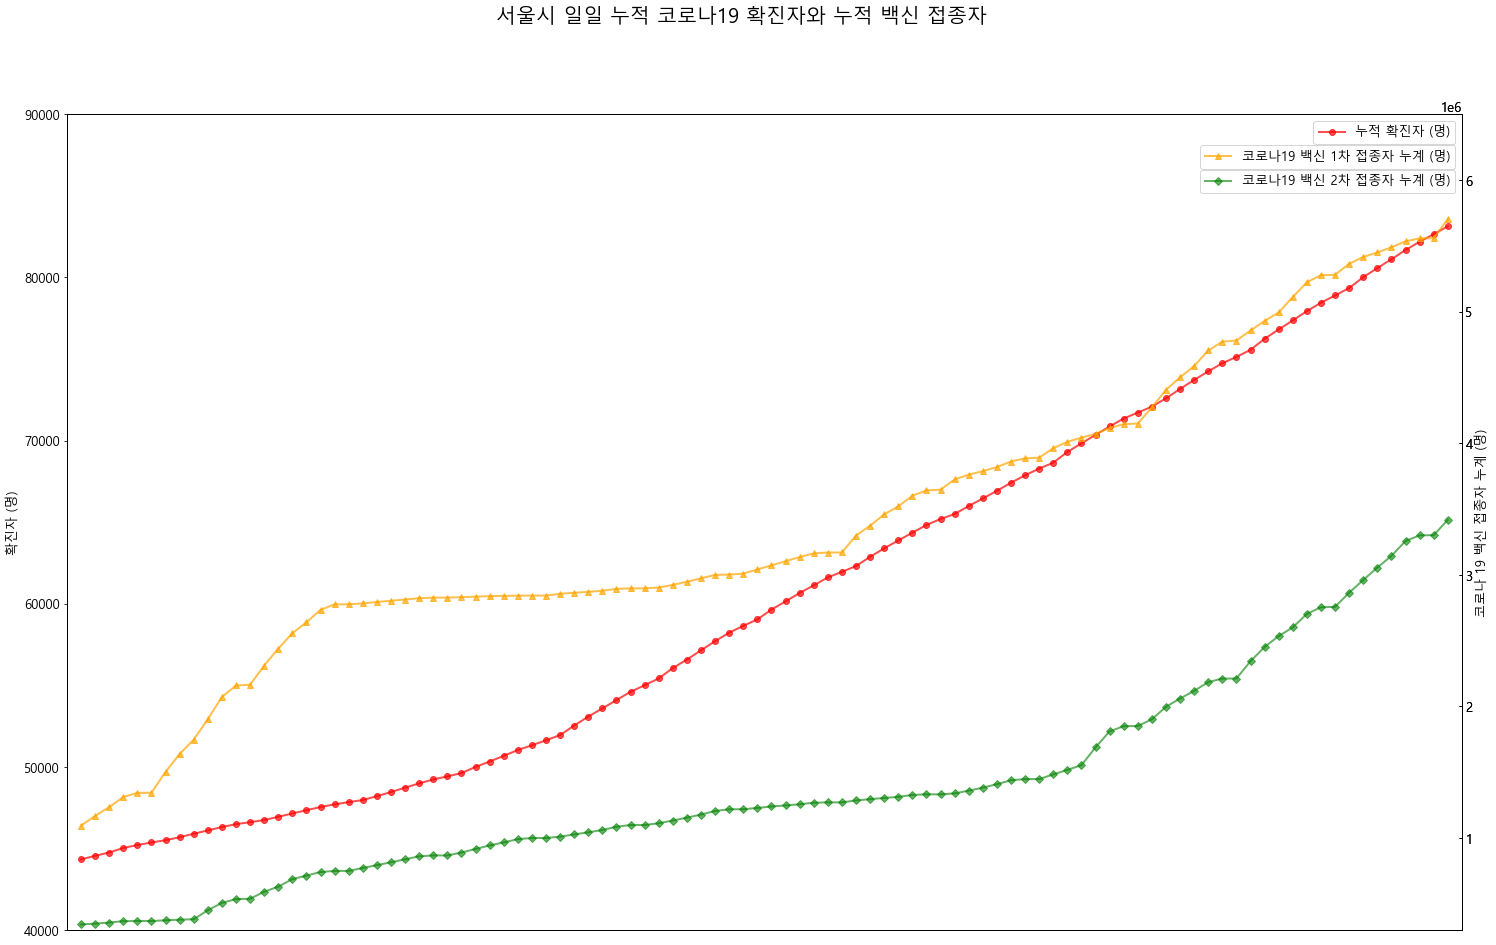

In [27]:
import matplotlib.pyplot as plt

# 한글을 쓰면 폰트가 깨지기 때문에 사용할 폰트를 직접 컴퓨터에 있는 폰트로 지정.
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF" 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


x=[]  # 그래프 x축 명 지정을 위해 표의 값을 리스트로 저장.
for i in graph_table.index:
    x.append(graph_table['날짜'].values[i])
    
y0=[]  # 데이터 값 표기를 위해 데이터 값 리스트로 저장.
for i in graph_table.index:
    y0.append(graph_table['누적확진자'].values[i])
    
y1=[]  # 데이터 값 표기를 위해 데이터 값 리스트로 저장.
for i in graph_table.index:
    y1.append(graph_table['1차 접종 누계'].values[i])

y2=[]  # 데이터 값 표기를 위해 데이터 값 리스트로 저장.
for i in graph_table.index:
    y2.append(graph_table['2차 접종 누계'].values[i])

# 그래프 전역 설정
plt.rcParams['figure.figsize'] = (25, 15)  # 그래프 크기 지정
plt.rcParams['font.size'] = 13             # 그래프 전역 폰트 크기 지정

fig, ax1 = plt.subplots()  # 여러개의 그래프를 그려야 하기 때문에 ".subplots()" 메서드 사용.
# subplots의 타이틀 메서드인 ".suptitle()" 사용.
fig.suptitle('서울시 일일 누적 코로나19 확진자와 누적 백신 접종자', fontsize=20) 
ax1.plot(x, y0, '-o', color='red', markersize=6, linewidth=2, label='누적 확진자 (명)', alpha=0.7) 
ax1.set_xlim(-1, 98)  # 그래프 x축 제한 메서드 "set_xlim()" 사용 하여 그래프 축 한계 설정.
ax1.set_ylim(40000, 90000)  # 그래프 y축 제한 메서드 "set_ylim()" 사용 하여 그래프 축 한계 설정.
ax1.set_xlabel('날짜')
ax1.set_ylabel('확진자 (명)')
ax1.get_xaxis().set_visible(False)
#ax1.axis(axis='x', 'off')
#ax1.tick_params(axis='x', direction='in', rotation = 90)

# 데이터 값 표시를 위하여 "text()" 함수 사용. "text()" 함수는 text(x좌표, y좌표, 데이터값, 기타 옵션) 형태로 사용.
#for i, v in enumerate(new_table.index):
#    ax1.text(i,y0[i]+5, "%0.0f" %y0[i]+'명', fontsize=10, color='red', horizontalalignment='center',rotation=75)

ax2 = ax1.twinx()
ax2.plot(x, y1, '-^', color='orange', markersize=6, linewidth=2, label='코로나19 백신 1차 접종자 누계 (명)', alpha=0.7)
ax2.set_xlim(-1, 98)
ax2.set_ylim(300000, 6500000)
#ax2.set_ylabel(r'코로나 19 백신 접종자 누계 (명)')
ax2.tick_params(axis='y', direction='in')
#for i, v in enumerate(new_table.index):
#    ax2.text(i, y1[i]+150000, "%0.1f" %y1[i]+'명', fontsize=9, color='orange', rotation=85)  # x 좌표, y 좌표, text

ax3 = ax1.twinx()
ax3.plot(x, y2, '-D', color='green', markersize=6, linewidth=2, label='코로나19 백신 2차 접종자 누계 (명)', alpha=0.6)
ax3.set_xlim(-1, 98)
ax3.set_ylim(300000, 6500000)
ax3.set_ylabel(r'코로나 19 백신 접종자 누계 (명)')
ax3.tick_params(axis='y', direction='in')
#for i, v in enumerate(new_table.index):
#    ax3.text(i, y2[i]+150000, "%0.1f" %y2[i]+'명', fontsize=9, color='green', rotation=85)  # x 좌표, y 좌표, text

# 세개의 그래프를 그려서 범례도 3개 라서 각각의 위치를 겹치지 않게 지정.
ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,0.97))
ax3.legend(bbox_to_anchor=(1,0.94))
plt.savefig('서울시 일일 누적 코로나19 확진자와 누적 백신 접종자.png', dpi=300)